# Understanding The Aftermath of an Election

Lets look at the results of the 2016 presidential election for each congressional district compared to some demographic factors (race, education, income, and gender) for each district taken from the Census.

In [1]:
# Inline Chart Parameters
%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

# Ignore warnings, because why not... (this is probably bad)
import warnings
warnings.filterwarnings('ignore')

# R imports
%load_ext rpy2.ipython

# Python Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import us

In [2]:
%%R

smartRequire <- function(pkg) {
  if (!require(pkg, character.only = T)) { install.packages(pkg, repos='http://cran.us.r-project.org') }
  require(pkg, character.only = T)
}

libs <- c("ggplot2", "readr", "gridExtra")
lapply(libs, smartRequire)
sprintf("Successfully loaded: %s", libs)

[1] "Successfully loaded: ggplot2"   "Successfully loaded: readr"    
[3] "Successfully loaded: gridExtra"


In [3]:
df = pd.read_csv('pres_results_by_cd.csv')
df['trump_margin'] = df['Trump'] - df['Clinton']
df['state'] = df.ST.apply(lambda x: us.states.lookup(x).name)
df.head()

,Congressional Dist.,ST,CD,ST_ID,CD_ID,FIPS,Total Vote,Margin,Margin (%),Clinton,Trump,Johnson,Stein,McMullin,Fuente,Castle,trump_margin,state
0,District 1,AL,1,1,901,1001,"305,940","89,270",29.18,33.79,62.96,2.01,0.43,0.0,0.0,0.0,29.17,Alabama
1,District 2,AL,2,1,902,1002,"287,872","91,204",31.68,32.76,64.44,1.68,0.36,0.0,0.0,0.0,31.68,Alabama
2,District 3,AL,3,1,903,1003,"291,317","95,175",32.67,32.03,64.70,1.98,0.42,0.0,0.0,0.0,32.67,Alabama
3,District 4,AL,4,1,904,1004,"293,046","182,940",62.43,17.31,79.74,1.79,0.37,0.0,0.0,0.0,62.43,Alabama
4,District 5,AL,5,1,905,1005,"314,750","103,411",32.85,30.87,63.72,3.25,0.63,0.0,0.0,0.0,32.85,Alabama


In [4]:
df = df[['state','ST','CD','trump_margin']]
edu_df = pd.read_csv('census/education.csv')
edu_df = edu_df[['state','district','bachelor_degree_or_higher']]
df = df.merge(edu_df, left_on=('state','CD'), right_on=('state','district'), copy=False)

race_df = pd.read_csv('census/race.csv')
race_df = race_df[['state','district','white']]
df = df.merge(race_df, on=('state','district'), copy=False)

sex_df = pd.read_csv('census/sex.csv')
sex_df = sex_df[['state','district','male']]
df = df.merge(sex_df, on=('state','district'), copy=False)

income_df = pd.read_csv('census/income.csv')
income_df = income_df[['state','district','per_capita']]
df = df.merge(income_df, on=('state','district'), copy=False)

df.to_csv('df.csv', index=False) # Save to CSV file.
df.head()

,state,ST,CD,trump_margin,district,bachelor_degree_or_higher,white,male,per_capita
0,Alabama,AL,1,29.17,1,24.04,65.46,48.09,25695.0
1,Alabama,AL,2,31.68,2,21.79,61.26,48.78,24161.0
2,Alabama,AL,3,32.67,3,22.77,67.79,48.61,24132.0
3,Alabama,AL,4,62.43,4,17.03,83.31,48.93,22320.0
4,Alabama,AL,5,32.85,5,30.27,72.64,49.26,29758.0


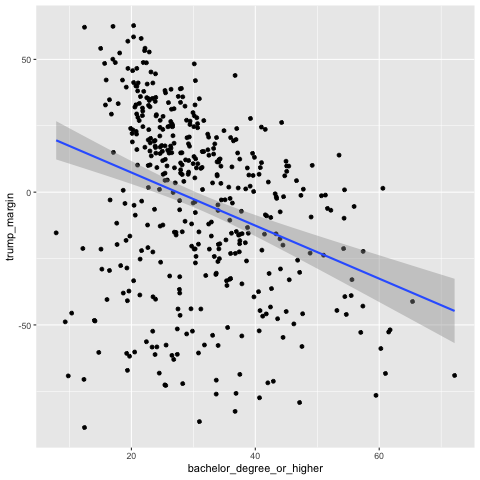

In [5]:
%%R

df <- read_csv('df.csv')
ggplot(df, aes(x=bachelor_degree_or_higher, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)

In [6]:
%%R -i df

# Linear Regression 
fit <- lm(trump_margin ~ bachelor_degree_or_higher, data=df)
summary(fit)


Call:
lm(formula = trump_margin ~ bachelor_degree_or_higher, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.597  -18.786    9.293   23.826   55.696 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                27.3772     4.7259   5.793 1.35e-08 ***
bachelor_degree_or_higher  -0.9992     0.1447  -6.907 1.81e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.77 on 426 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.09859 
F-statistic:  47.7 on 1 and 426 DF,  p-value: 1.811e-11



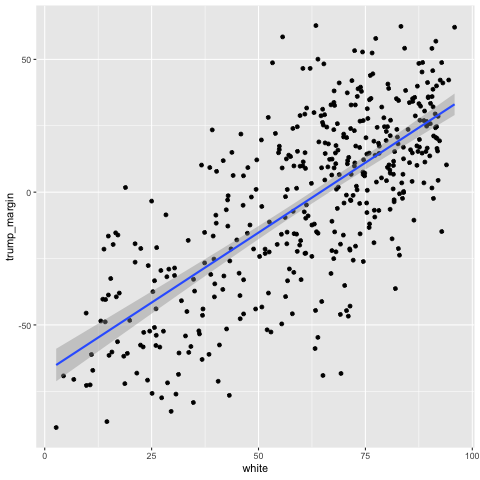

In [7]:
%%R -i df

ggplot(df, aes(x=white, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)


In [8]:
%%R -i df

# Linear Regression 
fit <- lm(trump_margin ~ white, data=df)
summary(fit)


Call:
lm(formula = trump_margin ~ white, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.372 -13.992   0.259  16.051  67.772 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -67.9229     3.2419  -20.95   <2e-16 ***
white         1.0538     0.0497   21.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.37 on 426 degrees of freedom
Multiple R-squared:  0.5135,	Adjusted R-squared:  0.5123 
F-statistic: 449.6 on 1 and 426 DF,  p-value: < 2.2e-16



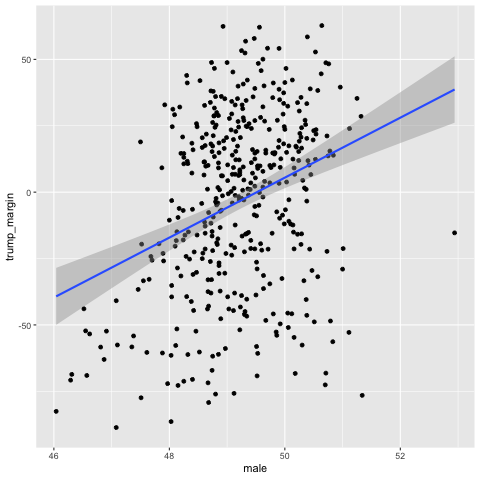

In [9]:
%%R -i df

ggplot(df, aes(x=male, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)

In [10]:
%%R -i df

# Linear Regression 
fit <- lm(trump_margin ~ male, data=df)
summary(fit)


Call:
lm(formula = trump_margin ~ male, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.114 -20.051   4.096  25.000  69.047 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -559.080     81.428  -6.866 2.35e-11 ***
male          11.291      1.655   6.824 3.05e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.81 on 426 degrees of freedom
Multiple R-squared:  0.09855,	Adjusted R-squared:  0.09643 
F-statistic: 46.57 on 1 and 426 DF,  p-value: 3.049e-11



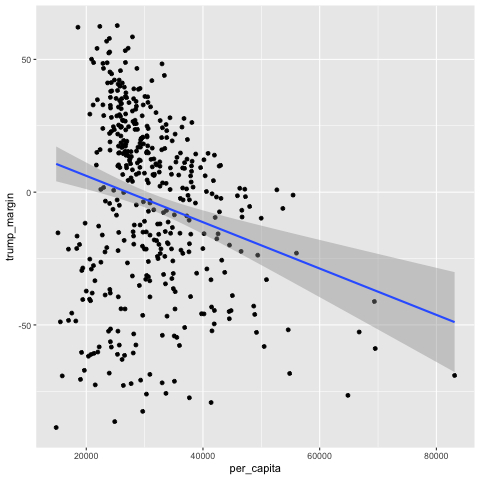

In [11]:
%%R -i df

ggplot(df, aes(x=per_capita, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)

In [12]:
%%R -i df

# Linear Regression 
fit <- lm(trump_margin ~ per_capita, data=df)
summary(fit)


Call:
lm(formula = trump_margin ~ per_capita, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-99.28 -22.11   9.44  23.76  61.23 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.5933395  5.8479538   4.034 6.49e-05 ***
per_capita  -0.0008726  0.0001814  -4.810 2.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.63 on 426 degrees of freedom
Multiple R-squared:  0.05151,	Adjusted R-squared:  0.04928 
F-statistic: 23.14 on 1 and 426 DF,  p-value: 2.099e-06



In [13]:
%%R -i df

# Multiple Linear Regression Example 
fit <- lm(trump_margin ~ bachelor_degree_or_higher + white + male + per_capita, data=df)
summary(fit) # show results


Call:
lm(formula = trump_margin ~ bachelor_degree_or_higher + white + 
    male + per_capita, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.937 -14.465  -0.482  12.499  51.140 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -2.739e+02  5.104e+01  -5.367 1.33e-07 ***
bachelor_degree_or_higher -9.798e-01  2.335e-01  -4.196 3.31e-05 ***
white                      1.064e+00  4.292e-02  24.799  < 2e-16 ***
male                       4.901e+00  1.039e+00   4.719 3.23e-06 ***
per_capita                -1.790e-04  2.861e-04  -0.626    0.532    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.29 on 423 degrees of freedom
Multiple R-squared:  0.6707,	Adjusted R-squared:  0.6676 
F-statistic: 215.4 on 4 and 423 DF,  p-value: < 2.2e-16



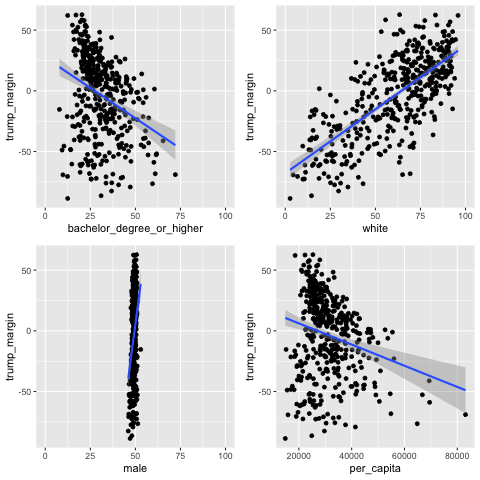

In [14]:
%%R -i df

p1 <- ggplot(df, aes(x=bachelor_degree_or_higher, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x) +
  xlim(0,100)

p2 <- ggplot(df, aes(x=white, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x) +
  xlim(0,100)

p3 <- ggplot(df, aes(x=male, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x) +
  xlim(0,100)

p4 <- ggplot(df, aes(x=per_capita, y=trump_margin)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)

grid.arrange(p1, p2, p3, p4, ncol=2)


# The Post Election-Day Story

Where Trump Got His Edge
https://fivethirtyeight.com/features/where-trump-got-his-edge/

- What did we chose to plot?
- Why did we chose to plot that?
- How did we normalize the data?
- What caveats are there?


# Some More Post-Election Coverage

- https://fivethirtyeight.com/features/trump-was-stronger-where-the-economy-is-weaker/
- https://fivethirtyeight.com/features/even-among-the-wealthy-education-predicts-trump-support/
- https://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/
- https://fivethirtyeight.com/features/war-is-peace-freedom-is-slavery-trump-won-in-a-landslide/
- https://fivethirtyeight.com/features/voter-turnout-fell-especially-in-states-that-clinton-won/
- https://fivethirtyeight.com/features/no-voter-turnout-wasnt-way-down-from-2012/
- https://fivethirtyeight.com/features/trump-probably-did-better-with-latino-voters-than-romney-did/
- https://fivethirtyeight.com/features/there-were-no-purple-state

# Retrospective: "The Real Story of 2016"

- https://fivethirtyeight.com/tag/the-real-story-of-2016/
